In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


In [31]:
df_train = pd.read_csv('D:\\data ANALYTICS AND SCIENCE\\PROJECT SUBMISSION DATA\\housing\\housing_train.CSV')
df_train



,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,Brunswick,52 Evans St,3,h,1650000,S,Nelson,5.2,3056,3.0,1.0,2.0,495.0,141.0,1920.0,Moreland
1,Reservoir,85 Radford Rd,5,h,791000,S,Ray,11.2,3073,4.0,3.0,1.0,961.0,NaN,NaN,Darebin
2,Newport,99 Anderson St,3,h,785000,S,RT,8.4,3015,3.0,1.0,1.0,185.0,NaN,NaN,Hobsons Bay
3,Brighton East,4/377 South Rd,2,u,755000,SP,Buxton,10.7,3187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hawthorn East,3 Jaques St,5,h,2500000,VB,RT,7.5,3123,5.0,3.0,3.0,757.0,240.0,1925.0,Boroondara
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531,Footscray,202/51 Gordon St,1,u,85000,PI,Burnham,6.4,3011,1.0,1.0,0.0,0.0,NaN,2007.0,Maribyrnong
7532,Oak Park,63 Vincent St,3,h,900000,SP,Nelson,11.5,3046,3.0,1.0,1.0,705.0,NaN,NaN,Moreland
7533,Camberwell,5 Gowar Av,4,h,2285000,PI,Jellis,7.8,3124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7534,Richmond,29a Abinger St,3,h,1185000,S,hockingstuart,2.6,3121,2.0,2.0,1.0,135.0,NaN,NaN,Yarra


In [5]:
df_test = pd.read_csv('D:\\data ANALYTICS AND SCIENCE\\PROJECT SUBMISSION DATA\\housing\\housing_test.CSV')
df_test

,Suburb,Address,Rooms,Type,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,Abbotsford,6/241 Nicholson St,1,u,S,Biggin,2.5,3067,1.0,1.0,1.0,0.0,NaN,NaN,Yarra
1,Abbotsford,403/609 Victoria St,2,u,S,Dingle,2.5,3067,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abbotsford,106/119 Turner St,1,u,SP,Purplebricks,2.5,3067,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abbotsford,22 Park St,4,h,S,Biggin,2.5,3067,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abbotsford,78 Yarra St,3,h,S,LITTLE,2.5,3067,2.0,1.0,1.0,138.0,105.0,1890.0,Yarra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,Keilor Park,1 Latrose St,3,h,PI,Nelson,14.5,3042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,Keilor Park,35 Spence St,3,h,S,Nelson,14.5,3042,3.0,2.0,2.0,554.0,129.0,1980.0,Brimbank
1882,Gardenvale,66A Gardenvale Rd,3,h,PI,Nick,9.8,3185,3.0,2.0,2.0,236.0,193.0,2004.0,Glen Eira
1883,Gardenvale,2/32 Gardenia Rd,2,u,SP,Biggin,9.8,3185,2.0,1.0,1.0,0.0,65.0,1970.0,Glen Eira


In [6]:
# Building the pipeline
fill_with_zero = SimpleImputer(strategy='constant', fill_value=0)

dp_pipe = ColumnTransformer([
    ('drop_vars', 'drop', ['Address', 'Postcode', 'CouncilArea', 'SellerG']),
    ('to_numeric', fill_with_zero, ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']),
    ('to_dummies', OneHotEncoder(handle_unknown='ignore'), ['Type', 'Method', 'Suburb'])
])

In [7]:
# Preparing the pipeline
dp_pipe.fit(df_train)
train = dp_pipe.transform(df_train)
test = dp_pipe.transform(df_test)

In [8]:
# Random Forest model
rf_model = RandomForestRegressor()

# Tuning the parameters
param_grid = {
    'n_estimators': [100, 500],
    'max_features': [5, 25],
    'min_samples_leaf': [2, 10]
}

rf_grid_search = RandomizedSearchCV(rf_model, param_grid, scoring='neg_mean_squared_error', cv=10)
rf_grid_search.fit(train, df_train['Price'])

C:\Users\Sayak23\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': [5, 25],
                                        'min_samples_leaf': [2, 10],
                                        'n_estimators': [100, 500]},
                   scoring='neg_mean_squared_error')

In [9]:
# Get the best model
best_rf_model = rf_grid_search.best_estimator_
best_rf_model

RandomForestRegressor(max_features=25, min_samples_leaf=2, n_estimators=500)

In [12]:
# Variable importance
import numpy as np

# Get the feature names after transformation
feature_names = dp_pipe.transformers_[2][1].get_feature_names_out()

# Ensure the number of features matches the number of importances
num_features = len(feature_names)
importances = importances[:num_features]

# Create the DataFrame for variable importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)


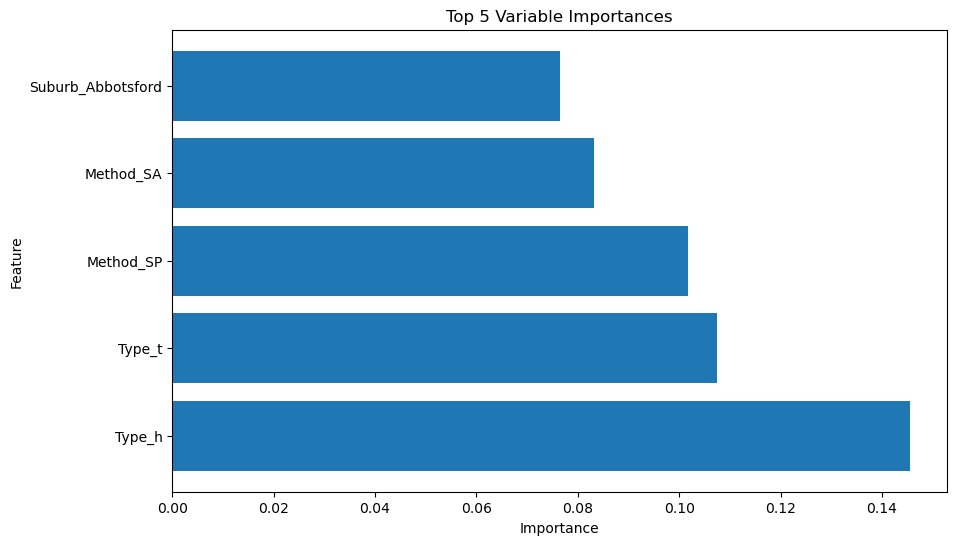

In [14]:
import matplotlib.pyplot as plt

# Select the top 5 variable importances
top_importances = importance_df.head(5)

# Plot the top 5 variable importances
plt.figure(figsize=(10, 6))
plt.barh(top_importances['Feature'], top_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Variable Importances')
plt.show()


In [15]:
# Make predictions
train_pred = best_rf_model.predict(train)
test_pred = best_rf_model.predict(test)
test_pred

array([ 418319.28123379,  706212.24519816,  471104.34681978, ...,
       1028216.08227873,  439029.76692051, 1517903.58030477])

In [16]:
# Convert predictions to a DataFrame
train_pred_df = pd.DataFrame({'Price': train_pred})
test_pred_df = pd.DataFrame({'Price': test_pred})
test_pred_df

,Price
0,4.183193e+05
1,7.062122e+05
2,4.711043e+05
3,1.901473e+06
4,1.281502e+06
...,...
1880,8.271975e+05
1881,8.729040e+05
1882,1.028216e+06
1883,4.390298e+05


In [17]:
# Find the variance of the target variable 'Price'.
import pandas as pd

df_train = pd.read_csv('D:\\data ANALYTICS AND SCIENCE\\R EDVANCER\\PROJECT SUBMISSION DATA\\housing\\housing_train.CSV')

price_variance = df_train['Price'].var()
print(price_variance)


432958829214.67993


**A higher variance suggests that the values in the 'Price' variable are more spread out from the mean, indicating a wider range of prices in the dataset.**

In [18]:
## Find out how many observations have missing values for variable 'YearBuilt'?

num_missing_yearbuilt = df_train['YearBuilt'].isnull().sum()
print(num_missing_yearbuilt)

3717


In [22]:
#What is the difference in average price between house type h and t?

import pandas as pd

# Calculate the difference in average price between house types 'h' and 't' and make it positive
price_diff = abs(df_train[df_train['Type'].isin(['h', 't'])].groupby('Type')['Price'].mean().diff().iloc[-1])

price_diff





392384.1973344474

In [23]:
# How many unique values variable postcode takes?

postcode_unique_count = df_train['Postcode'].nunique()
postcode_unique_count

94

In [26]:
# Which seller has maximum value transactions? ( Sum of Price)
seller_transactions = df_train.groupby('SellerG')['Price'].sum().reset_index()
max_transaction_value = seller_transactions['Price'].max()
max_transaction_seller = seller_transactions.loc[seller_transactions['Price'] == max_transaction_value, 'SellerG']

max_transaction_seller

85    Jellis
Name: SellerG, dtype: object

In [28]:
# Which CouncilArea has maximum average price?
#Calculate the average price for each CouncilArea
average_prices = df_train.groupby('CouncilArea')['Price'].mean()

#Find the maximum average price
max_average_price = average_prices.max()

#Get the CouncilArea(s) with the maximum average price
max_average_council_area = average_prices[average_prices == max_average_price].index.tolist()

max_average_council_area

['Bayside']

In [30]:
# which CouncilArea has maximum variance in the price?

# Calculate the variance of price for each CouncilArea
variances = df_train.groupby('CouncilArea')['Price'].var()

# Find the maximum variance
max_variance = variances.max()

# Get the CouncilArea(s) with the maximum variance
max_variance_council_area = variances[variances == max_variance].index.tolist()

max_variance_council_area


['Stonnington']